In [98]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plotly
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import regex as re

In [60]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab/faa_ai_prelim.csv')

In [62]:
df

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-FEB-16,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
new_df=pd.DataFrame(df,columns=['ACFT_MAKE_NAME','LOC_STATE_NAME','ACFT_MODEL_NAME','RMK_TEXT','FLT_PHASE','EVENT_TYPE_DESC','FATAL_FLAG'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

In [65]:
df.describe()

,ACFT_MISSING_FLAG,FAR_PART,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CBN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
count,0.0,1.0,64.000000,6.000000,1.0,8.000000,0.0,0.0,0.0,0.0,...,17.000000,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,NaN,91.0,1.218750,1.333333,3.0,1.500000,NaN,NaN,NaN,NaN,...,1.823529,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
std,NaN,NaN,0.700765,0.516398,NaN,0.534522,NaN,NaN,NaN,NaN,...,1.236694,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
25%,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
50%,NaN,91.0,1.000000,1.000000,3.0,1.500000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
75%,NaN,91.0,1.000000,1.750000,3.0,2.000000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
max,NaN,91.0,6.000000,2.000000,3.0,2.000000,NaN,NaN,NaN,NaN,...,6.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0


In [66]:
column_name = "FSDO_DESC"
df.dropna(subset=[column_name], inplace=True)

In [67]:
column_name = "ACFT_MAKE_NAME"
df.dropna(subset=[column_name], inplace=True)

In [68]:
column_name = "ACFT_MODEL_NAME"
df.dropna(subset=[column_name], inplace=True)

In [69]:
df.isnull().sum()

,0
UPDATED,0
ENTRY_DATE,0
EVENT_LCL_DATE,0
EVENT_LCL_TIME,0
LOC_CITY_NAME,0
LOC_STATE_NAME,0
LOC_CNTRY_NAME,75
RMK_TEXT,0
EVENT_TYPE_DESC,0
FSDO_DESC,0


In [70]:
for column,val in df.isnull().sum().items():
  if val>20:
    df.drop(column,axis=1,inplace=True)

In [71]:
df.isnull().sum()

,0
UPDATED,0
ENTRY_DATE,0
EVENT_LCL_DATE,0
EVENT_LCL_TIME,0
LOC_CITY_NAME,0
LOC_STATE_NAME,0
RMK_TEXT,0
EVENT_TYPE_DESC,0
FSDO_DESC,0
REGIST_NBR,0


In [72]:
for column,val in df.isnull().sum().items():
  if val>0:
    if df[column].dtype in ['int64','float64']:
      df.fillna(df[column].mean(),inplace=True)
    else:
      df.fillna(df[column].mode()[0],inplace=True)

/tmp/ipython-input-1462638289.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(df[column].mode()[0],inplace=True)


In [73]:
df.isnull().sum()

,0
UPDATED,0
ENTRY_DATE,0
EVENT_LCL_DATE,0
EVENT_LCL_TIME,0
LOC_CITY_NAME,0
LOC_STATE_NAME,0
RMK_TEXT,0
EVENT_TYPE_DESC,0
FSDO_DESC,0
REGIST_NBR,0


In [74]:
df

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,ACFT_DMG_DESC,FLT_PHASE,FLT_CRW_INJ_NONE
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,BEECH,36,Unknown,UNKNOWN (UNK),Unknown
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,VANS,RV7,Unknown,LANDING (LDG),1.0
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,CESSNA,172,Minor,APPROACH (APR),1.0
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,LANCAIR,235,Unknown,LANDING (LDG),1.0
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,CESSNA,172,Minor,LANDING (LDG),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-FEB-16,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,AERONCA,O58B,Substantial,LANDING (LDG),1.0
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NORTH AMERICAN,F51,Destroyed,UNKNOWN (UNK),Unknown
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,CHAMPION,8KCAB,Destroyed,UNKNOWN (UNK),Unknown
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,BEECH,35,Destroyed,UNKNOWN (UNK),Unknown


In [75]:
numeric_df = df.select_dtypes(include=['number'])
if numeric_df.empty:
    print("No numeric columns found! Cannot create correlation heatmap.")

No numeric columns found! Cannot create correlation heatmap.


In [76]:
df.drop(['ENTRY_DATE','UPDATED'], axis=1, inplace=True)

In [77]:
df

,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,ACFT_DMG_DESC,FLT_PHASE,FLT_CRW_INJ_NONE
0,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,BEECH,36,Unknown,UNKNOWN (UNK),Unknown
1,18-FEB-16,23:55:00Z,TAVERNIER,Florida,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,VANS,RV7,Unknown,LANDING (LDG),1.0
2,18-FEB-16,22:14:00Z,TRENTON,New Jersey,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,CESSNA,172,Minor,APPROACH (APR),1.0
3,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,LANCAIR,235,Unknown,LANDING (LDG),1.0
4,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,CESSNA,172,Minor,LANDING (LDG),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,AERONCA,O58B,Substantial,LANDING (LDG),1.0
79,05-FEB-16,11:17:00Z,MARICOPA,Arizona,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NORTH AMERICAN,F51,Destroyed,UNKNOWN (UNK),Unknown
80,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,CHAMPION,8KCAB,Destroyed,UNKNOWN (UNK),Unknown
81,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,BEECH,35,Destroyed,UNKNOWN (UNK),Unknown


In [78]:
df['Date_Time'] = df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME']

In [79]:
df

,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,ACFT_DMG_DESC,FLT_PHASE,FLT_CRW_INJ_NONE,Date_Time
0,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,BEECH,36,Unknown,UNKNOWN (UNK),Unknown,19-FEB-16 00:45:00Z
1,18-FEB-16,23:55:00Z,TAVERNIER,Florida,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,VANS,RV7,Unknown,LANDING (LDG),1.0,18-FEB-16 23:55:00Z
2,18-FEB-16,22:14:00Z,TRENTON,New Jersey,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,CESSNA,172,Minor,APPROACH (APR),1.0,18-FEB-16 22:14:00Z
3,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,LANCAIR,235,Unknown,LANDING (LDG),1.0,18-FEB-16 17:10:00Z
4,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,CESSNA,172,Minor,LANDING (LDG),1.0,18-FEB-16 00:26:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,AERONCA,O58B,Substantial,LANDING (LDG),1.0,31-DEC-15 17:00:00Z
79,05-FEB-16,11:17:00Z,MARICOPA,Arizona,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NORTH AMERICAN,F51,Destroyed,UNKNOWN (UNK),Unknown,05-FEB-16 11:17:00Z
80,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,CHAMPION,8KCAB,Destroyed,UNKNOWN (UNK),Unknown,05-FEB-16 23:02:00Z
81,05-FEB-16,23:02:00Z,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,BEECH,35,Destroyed,UNKNOWN (UNK),Unknown,05-FEB-16 23:02:00Z


In [80]:
df.drop(['EVENT_LCL_DATE','EVENT_LCL_TIME'], axis=1, inplace=True)

In [81]:
df.columns

Index(['LOC_CITY_NAME', 'LOC_STATE_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC',
       'FSDO_DESC', 'REGIST_NBR', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME',
       'ACFT_DMG_DESC', 'FLT_PHASE', 'FLT_CRW_INJ_NONE', 'Date_Time'],
      dtype='object')

In [82]:
new_df.isnull().sum()

,0
ACFT_MAKE_NAME,5
LOC_STATE_NAME,0
ACFT_MODEL_NAME,4
RMK_TEXT,0
FLT_PHASE,1
EVENT_TYPE_DESC,0
FATAL_FLAG,75


In [84]:
new_df.fillna(df['FLT_PHASE'].mode()[0],inplace=True)

In [85]:
df.groupby(['ACFT_MODEL_NAME']).count()

,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_DMG_DESC,FLT_PHASE,FLT_CRW_INJ_NONE,Date_Time
ACFT_MODEL_NAME,,,,,,,,,,,
140,1,1,1,1,1,1,1,1,1,1,1
150,3,3,3,3,3,3,3,3,3,3,3
152,2,2,2,2,2,2,2,2,2,2,2
172,4,4,4,4,4,4,4,4,4,4,4
175,1,1,1,1,1,1,1,1,1,1,1
180,1,1,1,1,1,1,1,1,1,1,1
182,1,1,1,1,1,1,1,1,1,1,1
206,3,3,3,3,3,3,3,3,3,3,3
210,4,4,4,4,4,4,4,4,4,4,4


In [89]:
df.groupby(['ACFT_MODEL_NAME'])['ACFT_MODEL_NAME'].count()

,ACFT_MODEL_NAME
ACFT_MODEL_NAME,
140,1
150,3
152,2
172,4
175,1
180,1
182,1
206,3
210,4


In [90]:
for val in df['ACFT_DMG_DESC'].unique():
    df[f"ACFT_DMG_DESC_{val}"] = (df['ACFT_DMG_DESC'] == val).astype(int)

In [ ]:
df.drop('ACFT_DMG_DESC',axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 82
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LOC_CITY_NAME              75 non-null     object
 1   LOC_STATE_NAME             75 non-null     object
 2   RMK_TEXT                   75 non-null     object
 3   EVENT_TYPE_DESC            75 non-null     object
 4   FSDO_DESC                  75 non-null     object
 5   REGIST_NBR                 75 non-null     object
 6   ACFT_MAKE_NAME             75 non-null     object
 7   ACFT_MODEL_NAME            75 non-null     object
 8   FLT_PHASE                  75 non-null     object
 9   FLT_CRW_INJ_NONE           75 non-null     object
 10  Date_Time                  75 non-null     object
 11  ACFT_DMG_DESC_Unknown      75 non-null     int64 
 12  ACFT_DMG_DESC_Minor        75 non-null     int64 
 13  ACFT_DMG_DESC_Substantial  75 non-null     int64 
 14  ACFT_DMG_DESC_Des

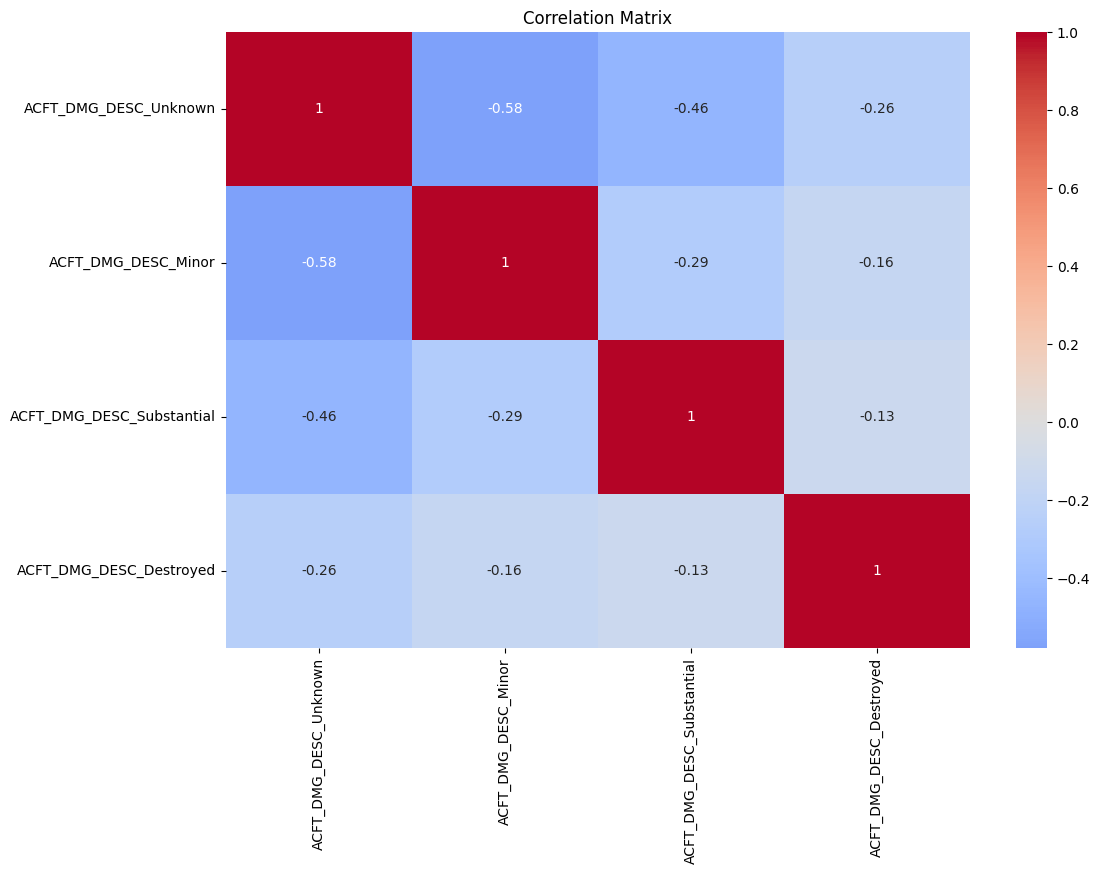

In [97]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

Flight Phase Comparison:
FLIGHT_PHASE_TEXT  APPROACH  LANDING  STANDING  TAKEOFF  TAXI  UNKNOWN  Total
FLT_PHASE                                                                    
APPROACH                  2        0         0        0     0        0      2
LANDING                   0       42         0        0     0        0     42
STANDING                  0        0         3        0     0        0      3
TAKEOFF                   0        0         0        6     0        0      6
TAXI                      0        1         0        0     9        0     10
UNKNOWN                   0        3         1        0     0        7     11
Unknown                   0        1         0        0     0        0      1
Total                     2       47         4        6     9        7     75


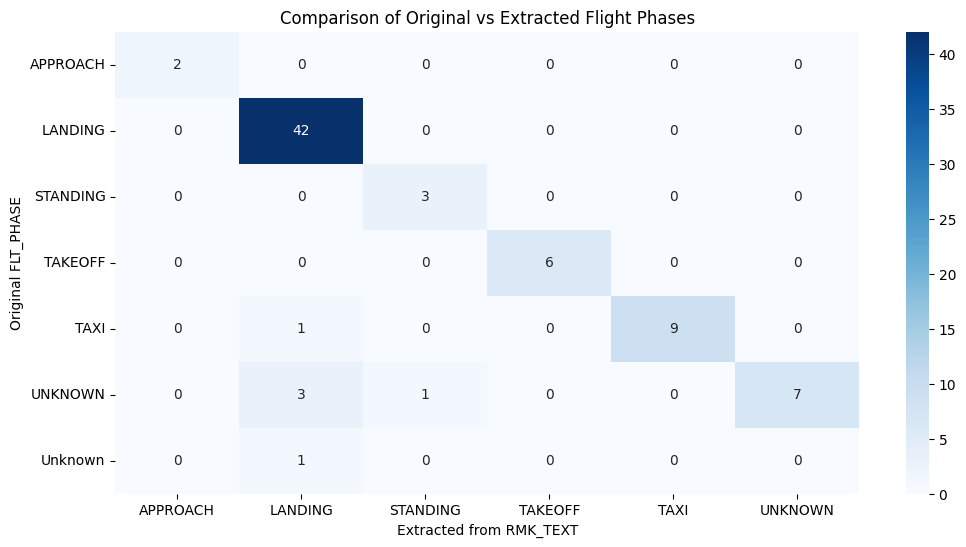

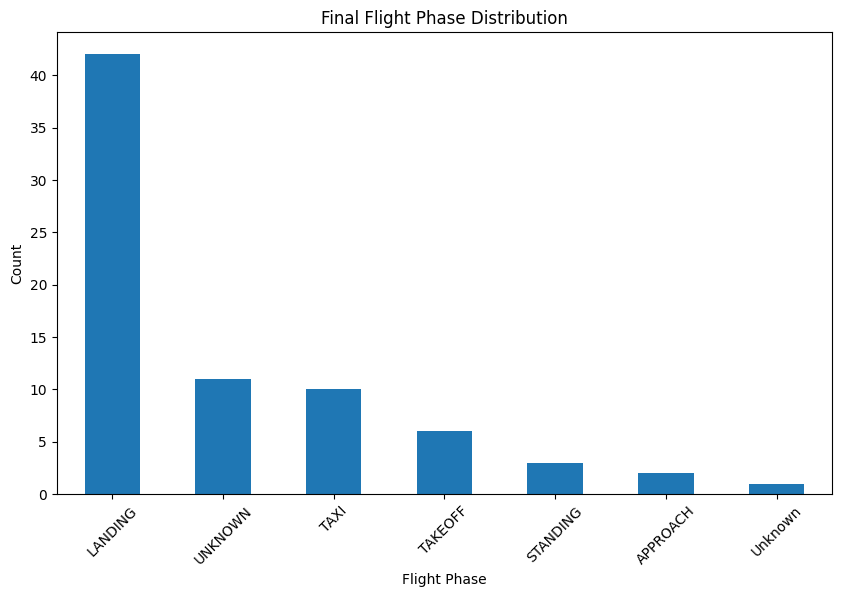

In [100]:
PHASE_KEYWORDS = {
    'TAKEOFF': ['takeoff', 'take-off', 'departure', 'climb out', 'rotat', 'liftoff', 'initial climb'],
    'CLIMB': ['climb', 'ascend', 'climbing', 'going up', 'climbout'],
    'CRUISE': ['cruise', 'level flight', 'enroute', 'level at', 'at altitude', 'steady flight'],
    'DESCENT': ['descent', 'descend', 'descending', 'going down', 'let down'],
    'APPROACH': ['approach', 'final approach', 'glide slope', 'glidepath', 'on final', 'base leg', 'downwind'],
    'LANDING': ['landing', 'touchdown', 'flare', 'landed', 'rollout', 'decelerat', 'braking'],
    'TAXI': ['taxi', 'taxiing', 'movement', 'ramp area', 'apron', 'holding'],
    'STANDING': ['standing', 'parked', 'ramp', 'gate', 'docked', 'at terminal', 'boarding'],
    'UNKNOWN': ['unknown', 'undetermined', 'not reported', 'n/a']
}

def extract_flight_phase(text):
    if pd.isna(text):
        return 'UNKNOWN'

    text = str(text).upper()

    for phase, keywords in PHASE_KEYWORDS.items():
        for keyword in keywords:
            if re.search(rf'\b{keyword.upper()}\b', text):
                return phase

    return 'UNKNOWN'

df['FLIGHT_PHASE_TEXT'] = df['RMK_TEXT'].apply(extract_flight_phase)

df['FLT_PHASE'] = df['FLT_PHASE'].str.replace(r'\s*\(.*\)', '', regex=True)

phase_comparison = pd.crosstab(
    df['FLT_PHASE'],
    df['FLIGHT_PHASE_TEXT'],
    margins=True,
    margins_name="Total"
)

print("Flight Phase Comparison:")
print(phase_comparison)

plt.figure(figsize=(12, 6))
sns.heatmap(phase_comparison.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
plt.title('Comparison of Original vs Extracted Flight Phases')
plt.xlabel('Extracted from RMK_TEXT')
plt.ylabel('Original FLT_PHASE')
plt.show()

df['FLT_PHASE_FINAL'] = df['FLT_PHASE'].fillna(df['FLIGHT_PHASE_TEXT'])
df['FLT_PHASE_FINAL'] = df['FLT_PHASE_FINAL'].replace('', 'UNKNOWN')

plt.figure(figsize=(10, 6))
df['FLT_PHASE_FINAL'].value_counts().plot(kind='bar')
plt.title('Final Flight Phase Distribution')
plt.xlabel('Flight Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [101]:
df

,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,FLT_PHASE,FLT_CRW_INJ_NONE,Date_Time,ACFT_DMG_DESC_Unknown,ACFT_DMG_DESC_Minor,ACFT_DMG_DESC_Substantial,ACFT_DMG_DESC_Destroyed,FLIGHT_PHASE_TEXT,FLT_PHASE_FINAL
0,MARSHVILLE,North Carolina,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,BEECH,36,UNKNOWN,Unknown,19-FEB-16 00:45:00Z,1,0,0,0,UNKNOWN,UNKNOWN
1,TAVERNIER,Florida,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,VANS,RV7,LANDING,1.0,18-FEB-16 23:55:00Z,1,0,0,0,LANDING,LANDING
2,TRENTON,New Jersey,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,CESSNA,172,APPROACH,1.0,18-FEB-16 22:14:00Z,0,1,0,0,APPROACH,APPROACH
3,ASHEVILLE,North Carolina,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,LANCAIR,235,LANDING,1.0,18-FEB-16 17:10:00Z,1,0,0,0,LANDING,LANDING
4,TALKEETNA,Alaska,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,CESSNA,172,LANDING,1.0,18-FEB-16 00:26:00Z,0,1,0,0,LANDING,LANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,SAN ANTONIO,Texas,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,AERONCA,O58B,LANDING,1.0,31-DEC-15 17:00:00Z,0,0,1,0,LANDING,LANDING
79,MARICOPA,Arizona,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NORTH AMERICAN,F51,UNKNOWN,Unknown,05-FEB-16 11:17:00Z,0,0,0,1,UNKNOWN,UNKNOWN
80,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,CHAMPION,8KCAB,UNKNOWN,Unknown,05-FEB-16 23:02:00Z,0,0,0,1,UNKNOWN,UNKNOWN
81,SAN PEDRO,California,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,BEECH,35,UNKNOWN,Unknown,05-FEB-16 23:02:00Z,0,0,0,1,UNKNOWN,UNKNOWN
